# <span style="color:#336699">CAP394 - Introduction to Data Science </span>
<hr style="border:2px solid #0077b9;">

###  Caio Gustavo Rodrigues da Cruz 
Aluno da CSE - Engenharia e Gerenciamento de Sistemas Espaciais

# Um estudo sobre o estado dos dados de telemetrias da operação de um satélite.

<hr style="border:1px solid #0077b9;">

O volume de dados de telemetrias de satélites é elevado, como por exemplo, os dados monitorados pelo Centro de Rastreio e Controle de Satélites - CRC no INPE, uma vez que atualmente três satélites são controlados (SCD1, SCD2 e CBERS4) e por exemplo os satélites da família SCD tem aproximadamente 13 orbitas diárias e cada uma dura em média 12 minutos, sendo que a cada segundo são recebidos dois frames de informação, temos então 1440 frames (12 minutos x 60 segundos x 2 frames) em cada passagem. Os satélites SCD1 e SCD2 estão em operação a mais de 20 anos.

O crescente aumento de sistemas automatizados nas missões espaciais tem gerado preocupação com segurança e confiabilidade nas operações realizadas com satélites. Para prevenir a geração de estados inseguros às operações, estratégias foram criadas para validar planos de operação de voo gerados a partir de planejadores automáticos. As pesquisas demonstraram que estados inseguros podem ser gerados. 



## É possível realizar predições a partir da classificação de telemetrias de satélites?




Um Modelo de classificação para gerar prognóstico de estados de satélite foi apresentado no seguinte trabalho, uma classificação de telemetrias foi realizado para compor o processo de mineração de dados utilizado para definir quais algoritmos obtém melhor acurácia na predição desses dados. 


<img src="./img/logo.png" alt="Validation of Flight Operations Plan: architecture and situation">
###### Souza, Primavera Botelho De. (2011) A Classification Model to Generate Prognosis of Satellite.

O trabalho realiza classificação de dados de telemetrias do PSS - Subsistema de Suprimento de Energia de um satélite simulado. O módulo `Diagnosis Generator` utiliza técnicas de Inteligência Artificial destinadas a prever o comportamento de subsistemas críticos de satélites de plataforma, como o subsistema de suprimento de energia, diretamente afetados pelas ações contidas em cada plano de operação de voo.


<hr style="border:1px solid #0077b9;">

Neste trabalho uma massa de dados contento 135 telemetrias de um satélite foi recuperada em um arquivo no formato CSV das telemetrias recebidas do satélite durante a operação de um mês. As telemetrias que correspondem ao Subsistema de Suprimento de Energia serão selecionadas em um dataframe para o desenvolvimento da análise exploratória dos dados, visualização e classificação.

In [1]:
import pandas as pd

In [2]:
fullTelemetries =  pd.read_csv("data/telemetrias.csv", low_memory=False)

In [3]:
fullTelemetries.head()

,Data-Hora,TM001,TM002,TM003,TM004,TM005,TM006,TM007,TM008,TM009,...,TM141,TM142,TM145,TM146,TM147,TM352,TM353,TM354,TM355,CheckCRC
0,01-mar-2018 11:14:39.913,-120.00,20.5,33.6,33.6,160.8,33.6,33.6,158.4,1,...,5.6667,5.6667,OFF,NAO PROCESSADO,NAO PROCESSADO,NAO PROCESSADO,87.682,88.519,NAO PROCESSADO,OK
1,01-mar-2018 11:14:40.413,-117.81,20.5,26.4,-50.4,163.2,19.2,-52.8,168.0,1,...,5.6667,5.6667,OFF,NAO PROCESSADO,NAO PROCESSADO,NAO PROCESSADO,87.682,88.519,NAO PROCESSADO,OK
2,01-mar-2018 11:14:40.913,-121.15,20.5,-52.8,-24.0,160.8,-57.6,-24.0,153.6,1,...,5.6667,5.6667,OFF,NAO PROCESSADO,NAO PROCESSADO,NAO PROCESSADO,87.682,88.519,NAO PROCESSADO,OK
3,01-mar-2018 11:14:41.413,-121.92,20.5,-24.0,50.4,158.4,-19.2,52.8,153.6,1,...,5.6667,5.6667,OFF,NAO PROCESSADO,NAO PROCESSADO,NAO PROCESSADO,87.682,88.519,NAO PROCESSADO,OK
4,01-mar-2018 11:14:41.913,-129.50,20.5,48.0,7.2,160.8,48.0,4.8,153.6,1,...,5.6667,5.6667,OFF,NAO PROCESSADO,NAO PROCESSADO,NAO PROCESSADO,87.682,88.519,NAO PROCESSADO,OK


In [3]:
len(fullTelemetries)

296911

O dataframe apresenta 296911 *linhas* e 135 *colunas* dentre elas 133 são as telemetrias do satélite, a primeira coluna a Data e hora e a última um parâmetro de verificação checksum 

A seguir é apresentado um descrição dos dados do dataframe importado. É possível observar que os valores de mínimo e máximo apresentados possúem um range alto para algumas telemetrias. 



In [4]:
fullTelemetries.describe()

,TM001,TM002,TM003,TM004,TM005,TM006,TM007,TM008,TM009,TM010,...,TM135,TM136,TM137,TM138,TM139,TM140,TM141,TM142,TM353,TM354
count,296911.000000,296911.000000,296911.000000,296911.000000,296911.000000,296911.000000,296911.000000,296911.000000,296911.000000,296911.000000,...,296911.000000,296911.000000,296911.000000,296911.000000,296911.000000,296911.000000,296911.000000,296911.000000,296911.000000,296911.000000
mean,-121.844584,20.496741,-4.371888,-0.880854,92.666872,-5.239598,-1.312846,92.455536,0.999946,0.000115,...,12.609106,10.882949,14.551098,12.475052,12.613001,14.932879,9.163544,9.620217,90.304719,90.355254
std,4.256136,0.144431,103.688112,102.992080,74.279952,103.968867,103.439684,74.714762,0.007341,0.010700,...,2.065790,6.453273,14.928994,6.143418,6.264100,12.287372,3.889371,3.831240,4.346684,4.344802
min,-130.000000,13.000000,-297.600000,-300.000000,-300.000000,-600.000000,-600.000000,-600.000000,0.000000,0.000000,...,-60.000000,-60.000000,-60.000000,-60.000000,-60.000000,-60.000000,-60.000000,-60.000000,3.980200,13.716000
25%,-125.000000,20.500000,-86.400000,-81.600000,28.800000,-86.400000,-86.400000,28.800000,1.000000,0.000000,...,11.034000,6.000000,4.333300,7.666700,8.000000,7.000000,6.000000,6.000000,89.367000,89.491000
50%,-121.920000,20.500000,-4.800000,-2.400000,103.200000,-4.800000,0.000000,105.600000,1.000000,0.000000,...,12.759000,12.069000,21.250000,14.138000,13.793000,19.655000,9.333300,10.000000,90.342000,90.462000
75%,-118.750000,20.500000,76.800000,79.200000,158.400000,76.800000,76.800000,153.600000,1.000000,0.000000,...,13.793000,15.172000,26.250000,17.931000,17.586000,25.417000,11.034000,11.379000,93.266000,93.375000
max,-80.000000,20.500000,300.000000,300.000000,300.000000,600.000000,600.000000,600.000000,1.000000,1.000000,...,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,176.730000,177.510000


O comando a seguir retorna a quantidade de informações vazias para cada coluna do data frame

In [5]:
fullTelemetries.isnull().sum()

Data-Hora    0
TM001        0
TM002        0
TM003        0
TM004        0
TM005        0
TM006        0
TM007        0
TM008        0
TM009        0
TM010        0
TM011        0
TM012        0
TM013        0
TM014        0
TM015        0
TM016        0
TM017        0
TM018        0
TM019        0
TM020        0
TM021        0
TM022        0
TM023        0
TM024        0
TM025        0
TM026        0
TM027        0
TM028        0
TM029        0
            ..
TM119        0
TM120        0
TM121        0
TM122        0
TM124        0
TM126        0
TM127        0
TM128        0
TM129        0
TM130        0
TM131        0
TM132        0
TM133        0
TM134        0
TM135        0
TM136        0
TM137        0
TM138        0
TM139        0
TM140        0
TM141        0
TM142        0
TM145        0
TM146        0
TM147        0
TM352        0
TM353        0
TM354        0
TM355        0
CheckCRC     0
Length: 135, dtype: int64

A seguir é feita uma seleção contendo as telemetrias do subsistema de Suprimento de Energia - PSS. 

In [6]:
telemetriPSS = fullTelemetries[["TM072", "TM074","TM075","TM076","TM079","TM080","TM081","TM087","TM088","TM089","TM090","TM091","TM092","TM093","TM094","CheckCRC", "Data-Hora"]].copy()

In [7]:
telemetriPSS.describe()

,TM072,TM074,TM075,TM076,TM079,TM080,TM081,TM087,TM088,TM089,TM090,TM091,TM092,TM093,TM094
count,296911.000000,296911.000000,296911.000000,296911.000000,296911.000000,296911.000000,296911.000000,296911.000000,296911.000000,296911.000000,296911.000000,296911.000000,296911.000000,296911.000000,296911.000000
mean,8.385661,5.423245,1.909568,0.906581,-0.183745,21.708372,8.691402,5.118177,15.325160,-15.127535,26.690080,0.033650,0.282230,0.037103,0.898829
std,1.604885,0.242921,1.382272,0.888540,1.070807,1.000466,1.658737,0.077482,0.230698,0.233131,0.382921,0.069731,0.027044,0.027838,0.053694
min,-23.000000,0.000000,0.000000,0.000000,-4.100000,0.000000,-23.000000,0.000000,0.000000,-16.780000,0.000000,0.000000,-0.300000,0.000000,0.000000
25%,7.647100,5.310000,0.000000,0.000000,-1.378400,21.143000,7.857100,5.103000,15.300000,-15.169000,26.650000,0.025000,0.279410,0.034375,0.855930
50%,8.235300,5.520000,2.694100,0.525000,-0.087671,22.098000,8.571400,5.125700,15.300000,-15.102000,26.650000,0.037500,0.279410,0.034375,0.906780
75%,9.117600,5.550000,2.952900,1.795300,-0.087671,22.098000,9.285700,5.125700,15.368000,-15.102000,26.780000,0.037500,0.279410,0.034375,0.916950
max,80.000000,7.500000,5.900000,5.900000,2.250000,30.460000,80.000000,5.670000,17.000000,0.000000,32.500000,4.890000,0.710000,0.740000,2.500000


### O dataframe `telemetriPSS` foi filtrado somente com as telemetrias do PSS

Observando os valores de mínimo e máximo da telemetria `TM072`, por exemplo, os valores vão de `-23 a 80` possuindo um intervalo bastante alto. 

O arquivo manual_range.csv será carregado no dataframe valuesRanges. Os ranges correspondentes a cada telemetria do PSS serão carregados conforme dados que o manual do satélite estabelece para cada telemetria. 

In [8]:
valuesRanges =  pd.read_csv("data/manual_range.csv")

In [9]:
valuesRanges.values

array([['TM072', 'Battery temperature 1', -3.0, 26.0],
       ['TM074', 'Min. voltage in 4 batt. cells', 4.6, 6.25],
       ['TM075', 'Total panels current', 0.0, 5.856],
       ['TM076', 'Shunt current', 0.0, 5.0],
       ['TM079', 'Battery current', -3.0, 1.7],
       ['TM080', 'Battery voltage monitor', 16.0, 25.0],
       ['TM081', 'Battery temperature 2', -3.0, 26.0],
       ['TM087', '+5 V voltage monitor', 4.85, 5.45],
       ['TM088', '+15 V voltage monitor', 10.0, 15.8],
       ['TM089', '-15 V voltage monitor', -15.7, -14.6],
       ['TM090', 'Power bus voltage monitor', 26.2, 27.2],
       ['TM091', '+5 V current monitor', 0.0, 1.2],
       ['TM092', '+15 V current monitor', 0.0, 0.6],
       ['TM093', '-15 V current monitor', 0.0, 0.4],
       ['TM094', 'Power bus current monitor', 0.2, 1.7]], dtype=object)

Os dados carregados no dataframe `valuesRanges`serão percorridos para criar uma nova coluna no dataframe e os valores das telemetrias serão percorridos e comparados com os valores de `MIN e MAX` do `valuesRages` com objetivo de criar um classe indicando se os dados estão dentro ou fora do range previsto no manual do satélite.

In [11]:
ranges = []
classes = ""

# Loop para percorrer o dataframe 
for row in range(0, telemetriPSS.shape[0]):
    cont = False
    # Loop para percorrer o df de range das telemetrias
    for index in range(0,14):        
        
        # Localiza as informações da linha e verifica se esta dentro do range do manual
        if telemetriPSS.loc[row,telemetriPSS.columns[index]] < valuesRanges.loc[index,'MIN'] or telemetriPSS.loc[row,telemetriPSS.columns[index]] > valuesRanges.loc[index,'MAX']:
            # Esta fora do range 
            cont = True 
            break
           
    if(cont == False):
        classes = "DENTRO"
    else:
        classes = "FORA"
           
    ranges.append(classes)
        
# Adiciona a coluna ao dataframe
telemetriPSS["RANGES"] = ranges

Número de telemetrias`DENTRO`do range

In [12]:
len(telemetriPSS.query("RANGES == 'DENTRO'"))

294673

Número de telemetrias `FORA`do range

In [13]:
len(telemetriPSS.query("RANGES == 'FORA'"))

2238

Uma classificação do estado da bateria será feita a partir da telemetria indicada pelo monitor de voltagem da bateria, sendo classificado em SAFE, UNSAFE e FORBIDDEN conforme tabela a baixo:
<table>
  <tbody>
    <tr>
      <td style="font-weight: bold;text-align: center">Battery voltage monitor</td>    
      <td style="font-weight: bold;text-align: center">Status</td>
      <td style="font-weight: bold;text-align: center">Classe</td>
    </tr>
    <tr>
      <td style="text-align: center"> 20 </td>
      <td style="text-align: center">BAIXO</td>
      <td style="text-align: center">UNSAFE</td>
    </tr>
    <tr>
      <td style="text-align: center"> 20 ~ 25 </td>
      <td style="text-align: center">DENTRO</td>
      <td style="text-align: center">SAFE</td>
    </tr>
    <tr>
      <td style="text-align: center"> >25 </td>
      <td style="text-align: center">ALTO</td>
      <td style="text-align: center">FORBIDDEN</td>
    </tr>
      
  </tbody>
</table>

Essa classificação expressa o nível de voltagem medida na bateria, consideramos sendo considerado um estado seguro o intervalo entre 20V e 25V abaixo de 20 um estado em que esta sendo descarregada a bateria e por isso classificado como inseguro e por último quando a voltagem ultrapassa os máximo descrido do range do manual. Essa classificação segue a refência  do artigo `A Classification Model to Generate Prognosis of Satellite.`


In [10]:
classification = []
cl = ""

# Loop para percorrer o dataframe 
for row in range(0, telemetriPSS.shape[0]):
  
    # Localiza as informações da linha e verifica a voltagem esta a baixo do normal
    if telemetriPSS.loc[row,telemetriPSS.columns[5]] < 20:
        # Esta fora do range 
        cl = "UNSAFE"
           
    elif telemetriPSS.loc[row,telemetriPSS.columns[5]] > 25:
        cl = "FORBIDDEN"
    
    else:
        cl = "SAFE"
           
    classification.append(cl)
        
# Adiciona a coluna ao dataframe
telemetriPSS["BATT_CLASS"] = classification

In [11]:
len(telemetriPSS.query("BATT_CLASS == 'UNSAFE'"))

15681

In [12]:
len(telemetriPSS.query("BATT_CLASS == 'SAFE'"))

281173

In [13]:
len(telemetriPSS.query("BATT_CLASS == 'FORBIDDEN'"))

57

### O nome das colunas dos dataframe serão renomeadas com o nome das telemetrias

TM072 - Battery temperature 1

TM074 - Min. voltage in 4 batt. cells

TM075 - Total panels current

TM076 - Shunt current

TM079 - Battery current

TM080 - Battery voltage monitor

TM081 - Battery temperature 2

TM087 - +5 V voltage monitor

TM088 - +15 V voltage monitor

TM089 - -15 V voltage monitor

TM090 - Power bus voltage monitor

TM091 - +5 V current monitor

TM092 - +15 V current monitor

TM093 - -15 V current monitor

TM094 - Power bus current monitor

In [14]:
telemetriPSS = telemetriPSS.rename(index=str, columns={"TM072": "Battery_temperature_1","TM074": "Min._voltage_in_4_batt._cells","TM075": "Total_panels_current","TM076": "Shunt_current","TM079": "Battery_current","TM080": "Battery_voltage_monitor","TM081": "Battery_temperature_2","TM087": "+5_V_voltage_monitor","TM088": "+15_V_voltage_monitor","TM089": "-15_V_voltage_monitor","TM090": "Power_bus_voltage_monitor","TM091": "+5_V_current_monitor","TM092": "+15_V_current_monitor","TM093": "-15_V_current_monitor","TM094": "Power_bus_current_monitor","CheckCRC": "Checksum","Data-Hora": "Data-Hora","RANGES": "RANGES", "BATT_CLASS":"BATT_CLASS"}).copy()

In [15]:
telemetriPSS.head()

,Battery_temperature_1,Min._voltage_in_4_batt._cells,Total_panels_current,Shunt_current,Battery_current,Battery_voltage_monitor,Battery_temperature_2,+5_V_voltage_monitor,+15_V_voltage_monitor,-15_V_voltage_monitor,Power_bus_voltage_monitor,+5_V_current_monitor,+15_V_current_monitor,-15_V_current_monitor,Power_bus_current_monitor,Checksum,Data-Hora,BATT_CLASS
0,7.9412,5.31,2.6706,0.125,1.416,21.501,8.2143,5.1257,15.368,-15.169,26.65,0.0250,0.27941,0.034375,0.90678,OK,01-mar-2018 11:14:39.913,SAFE
1,7.9412,5.31,2.6471,0.125,1.416,21.501,8.2143,5.1257,15.300,-15.102,26.78,0.0375,0.27941,0.034375,0.90678,OK,01-mar-2018 11:14:40.413,SAFE
2,7.9412,5.31,2.7647,0.225,1.416,21.501,8.2143,5.1257,15.368,-15.169,26.65,0.0375,0.27941,0.034375,0.90678,OK,01-mar-2018 11:14:40.913,SAFE
3,7.9412,5.31,2.8118,0.300,1.416,21.501,8.2143,5.1257,15.300,-15.102,26.78,0.0375,0.27941,0.034375,0.90678,OK,01-mar-2018 11:14:41.413,SAFE
4,7.9412,5.31,2.7647,0.225,1.416,21.501,8.2143,5.1257,15.368,-15.169,26.65,0.0375,0.27941,0.034375,0.90678,OK,01-mar-2018 11:14:41.913,SAFE


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [17]:
telemetriPSS.columns

Index(['Battery_temperature_1', 'Min._voltage_in_4_batt._cells',
       'Total_panels_current', 'Shunt_current', 'Battery_current',
       'Battery_voltage_monitor', 'Battery_temperature_2',
       '+5_V_voltage_monitor', '+15_V_voltage_monitor',
       '-15_V_voltage_monitor', 'Power_bus_voltage_monitor',
       '+5_V_current_monitor', '+15_V_current_monitor',
       '-15_V_current_monitor', 'Power_bus_current_monitor', 'Checksum',
       'Data-Hora', 'BATT_CLASS'],
      dtype='object')

In [18]:
telemetriPlot = telemetriPSS.copy()

Visualização das 15 telemetrias de valores float do PSS sem nenhum tratamento

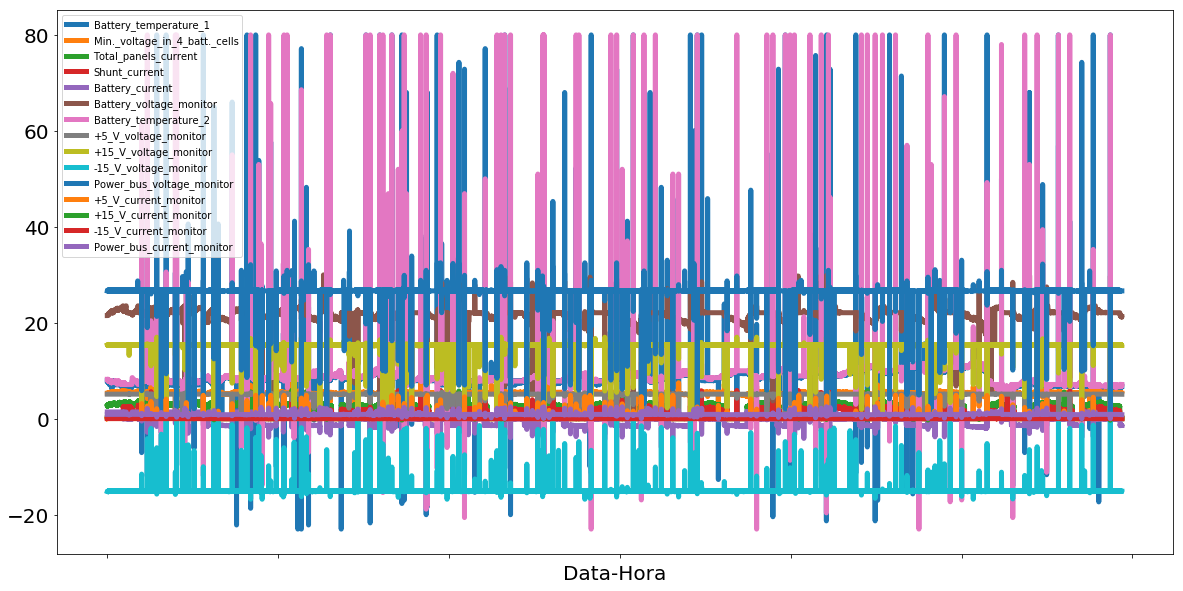

In [19]:
telemetriPlot.plot(figsize=(20,10), linewidth=5, fontsize=20) 
plt.xlabel('Data-Hora', fontsize=20);


O parâmetro Checksum que contém um o valor marcado como 'ERRO' será removido do dataframe.

In [20]:
telemetriPlot = telemetriPSS.query("Checksum == 'OK'").copy()

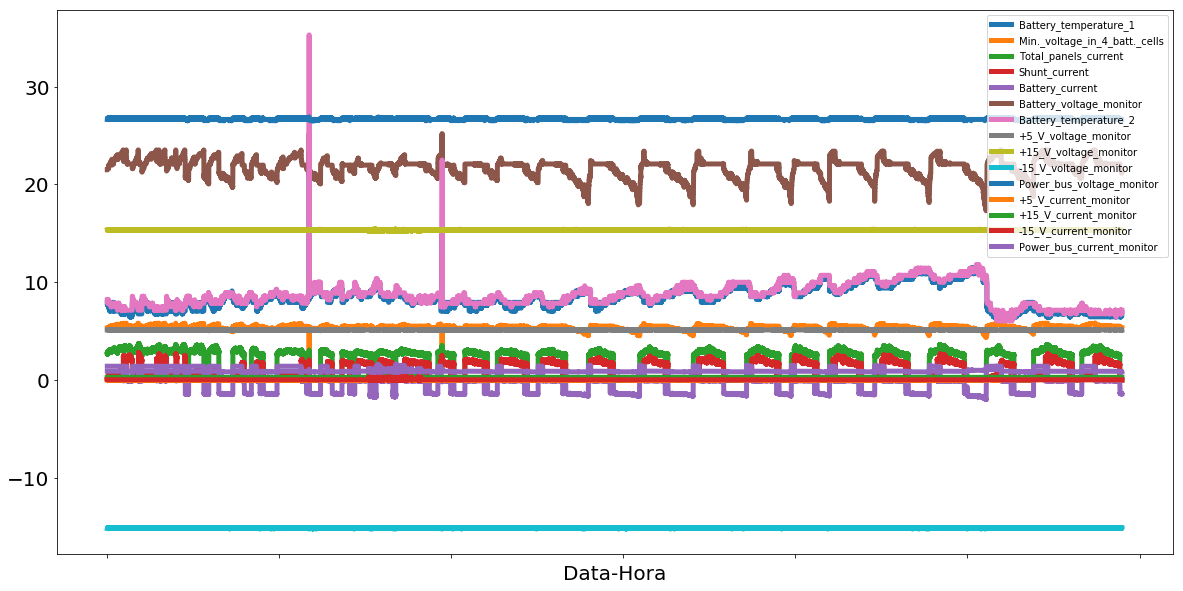

In [21]:
telemetriPlot.plot(figsize=(20,10), linewidth=5, fontsize=20) 
plt.xlabel('Data-Hora', fontsize=20);

Após tornar os dados tyde, o dataframe `telemetriaPlot` será filtrado e será apresentado o gráfico para os valores das seguintes telemetrias com dados correspondente a bateria:

        - TM072 Battery temperature 1
        - TM079 Battery current
        - TM080 Battery voltage monitor
        - TM081 Battery temperature 2
        - TM075 Total panels current

In [22]:
telemetriPlot = telemetriPlot[["Battery_temperature_1", "Battery_current","Battery_voltage_monitor","Battery_temperature_2","Total_panels_current","Shunt_current","BATT_CLASS"]].copy()

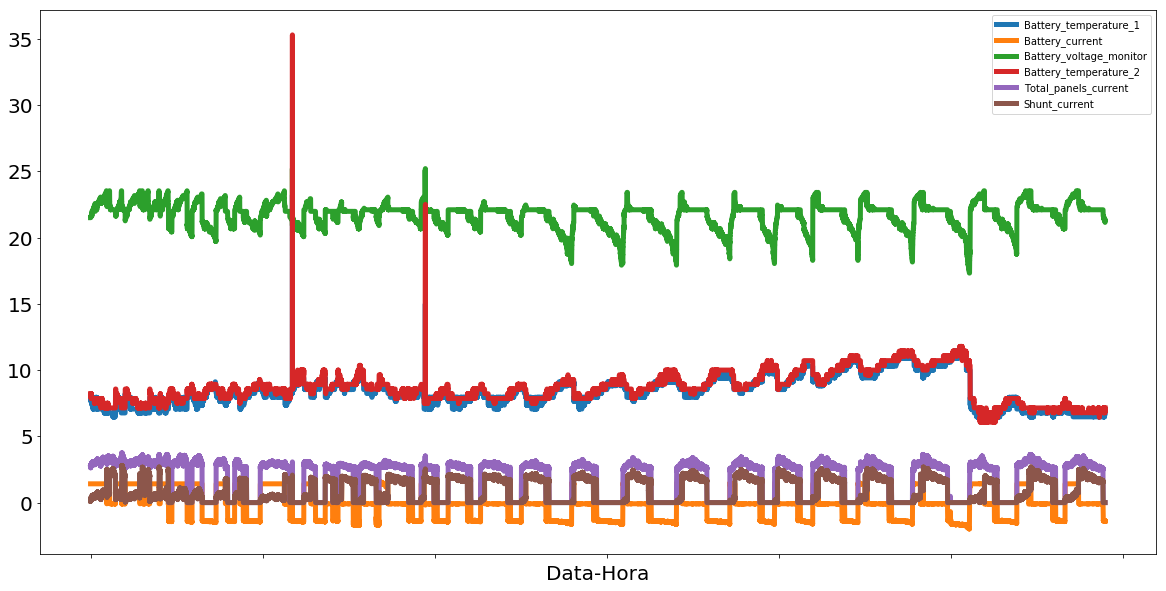

In [23]:
telemetriPlot.plot(figsize=(20,10), linewidth=5, fontsize=20) 
plt.xlabel('Data-Hora', fontsize=20);

No gráfico é possível observar que a telemetria `Total panels current` que representa a incidencia de sol nos paineis solares interfere diretamente com a telemetria `Battery voltage monitor` com dados de voltagem da bateria. Notamos que o valor da voltagem se mantém constante quando os paineis estão sendo alimentados.
 

Visualizando relacionamentos emparelhados em um conjunto de dados Para plotar várias distribuições bivariadas de pares em um conjunto de dados. Isso cria uma matriz de eixos e mostra o relacionamento de cada par de colunas em um DataFrame. Por padrão, também desenha a distribuição univariada de cada variável nos Eixos diagonais:

O gráfico abaixo foi plotado para representar a distribuição dos dados com relação à sua classificação presenta da coluna `BATT_CLASS` do dataframe.

In [24]:
telemetriPlot = telemetriPlot[["Battery_temperature_1", "Battery_voltage_monitor","Total_panels_current","Shunt_current","BATT_CLASS"]].copy()

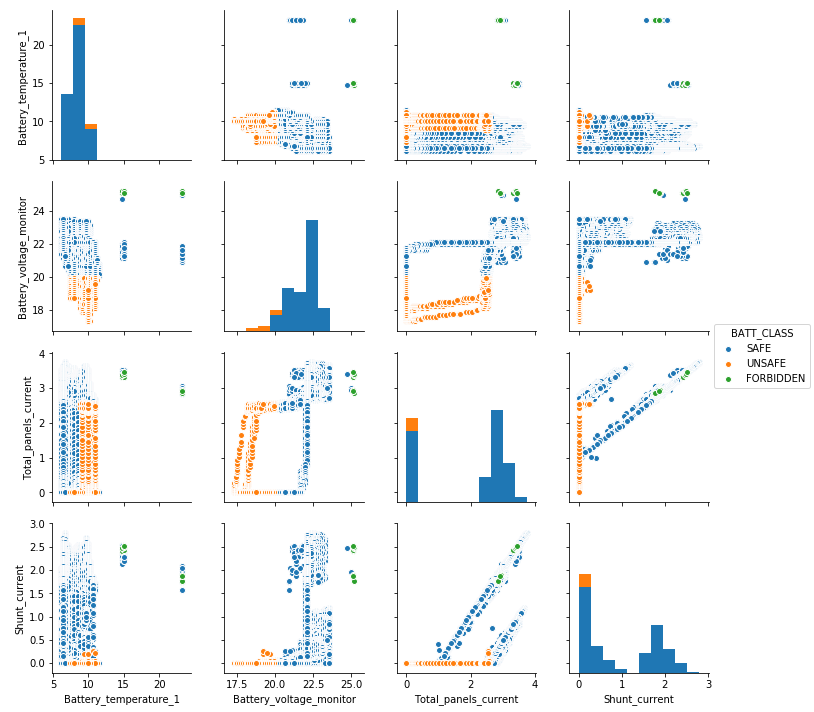

In [26]:
sns.pairplot(telemetriPlot, hue="BATT_CLASS")

O relacionamento entre as variáveis selecionados são apresentadas neste diagrama. Observamos que a voltagem da bateria e a corrente nos paineis solares são indicadores melhores para se classificar a segurança da bateria quando apresenta um gráfico com dados mais agrupados do que o relacionamento entre outras variáveis.

Salvando o dataframe em um arquivo CSV para ser importado no Orage. 

In [25]:
telemetriPlot.to_csv("data/dados_telemetria_TIDY.csv", sep=',')

#### Os dados foram importados no Orange e um fluxo de trabalho foi criado para classificar o estado da bateria 

<img src="./img/fluxo-orange.PNG" alt="ImagemFluxoTrabalhoOragem">

Foram selecionados 4 algoritmos para teste de classificação da massa de telemetrias. Os algoritimos KNN, Tree, Neural Network e Random Forest. Entre eles o algoritmo Neural Network obteve precisão de 0.979 na medida da área sob a curva ROC, porém com acurácia de 0.89 como mostra a tabela de avaliação de resultados:

<img src="./img/resultados.PNG" alt="ImagemResultadoClassificacao">

Concluímos que o algoritmo Random Forest obteve melhor resultado na classificação e divisão dos grupos das telemetrias. 

Segue abaixo duas referências utilizadas no desenvolvimento deste trabalho:

[Artigo Sobre Classificação de telemetrias]("./referencias/A_Classification_Model_to_Generate_Prognosis_of_Sa.pdf")

[Estudo sobre planejadores automáticos]("./referencias/Estudo_planejadores_automaticos.pdf")